# Import & Clean Data
Let us read the State Time Series data and do some basic analysis. The data is available from 2010 onwards, so let us remove the previous data from the data set.

In [94]:
import pandas as pd
df = pd.read_csv('zecon/State_time_series.csv')
df.Date = pd.to_datetime(df.Date)
df = df[df['Date'] >= '01-01-2010']
df.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
8157,2010-01-31,Alabama,168.0,32618.0,29765.0,NaN,98.633257,93.087748,103.971150,110.909091,...,67900.0,137400.0,123900.0,123400.0,232600.0,NaN,NaN,NaN,NaN,NaN
8158,2010-01-31,Alaska,130.0,3477.0,2748.0,182.03125,163.834951,154.224835,144.439421,125.418060,...,177200.0,176100.0,247200.0,257100.0,356200.0,NaN,NaN,NaN,NaN,NaN
8159,2010-01-31,Arizona,112.0,50231.0,50482.0,NaN,NaN,NaN,NaN,NaN,...,95800.0,121900.0,161500.0,168800.0,298500.0,NaN,NaN,NaN,NaN,NaN
8160,2010-01-31,Arkansas,121.0,18473.0,17416.0,NaN,81.283906,86.214953,94.750000,96.683503,...,59200.0,127300.0,105700.0,105700.0,185000.0,NaN,NaN,NaN,NaN,NaN
8161,2010-01-31,California,108.0,138662.0,132187.0,NaN,NaN,NaN,NaN,NaN,...,163600.0,313600.0,335100.0,340000.0,655700.0,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis (EDA)
Let us explore statewise data. Whether there is any trend for a specific state or what are the top 5 states?

## Top 7 States of Median Price Per Sqft
This is the top 7 states of Median Listring Price per Sqft All Homes

In [95]:
dfallhomes = df.groupby('RegionName', as_index=False)['MedianListingPricePerSqft_AllHomes'].\
    mean().dropna().sort_values('MedianListingPricePerSqft_AllHomes', ascending=False)
dfallhomes.head(7)

,RegionName,MedianListingPricePerSqft_AllHomes
8,DistrictofColumbia,419.093624
11,Hawaii,410.104882
4,California,267.298446
21,Massachusetts,205.758438
32,NewYork,172.085814
39,RhodeIsland,171.417274
5,Colorado,171.243077


## Bottom 5 states of Median Listing Price per Sqft All Homes
List the bottom 5 states from the results

In [105]:
dfallhomes.tail(5)

,RegionName,MedianListingPricePerSqft_AllHomes
36,Oklahoma,87.865113
35,Ohio,87.469543
3,Arkansas,87.355016
24,Mississippi,84.641021
14,Indiana,82.010350


## Trend in State Time Series
The most important EDA on time series data is to identify trend, seasonality & correlation. Let us check whether there is any trend in the data with the Top state data.

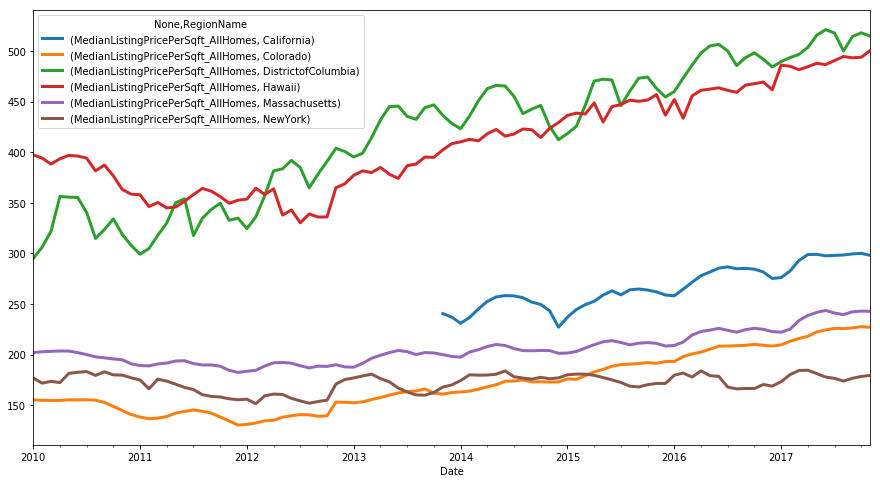

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
statelist = ['Hawaii', 'DistrictofColumbia', 'California', 'Massachusetts', 'NewYork', 'Colorado']
stateseries = pd.DataFrame(df[(df['RegionName'].\
    isin(statelist))][['Date','RegionName','MedianListingPricePerSqft_AllHomes']].\
    dropna().\
    groupby(['Date', 'RegionName'])['RegionName','MedianListingPricePerSqft_AllHomes'].mean().unstack())
stateseries.plot(figsize=(15,8), linewidth=3)
plt.show()

from the above graph, we can see that
1. There are trends for Hawaii & District of Columbia, even though it is up & down but there is a strong upward trend on these two states. This also shows that there is a seasonality in the trends. But the investment is costly in these two states.
2. There is no point in investing the homes in New York, it's almost stationary.
3. The similar trend of top 2 states is reflecting in Colorado also. This seems to be the best investment for homes as it is steadily increasing over the years among the top 5.

## Seasonality in trends
Let us check whether there is any seasonality in the trends. This is important for the predictions.

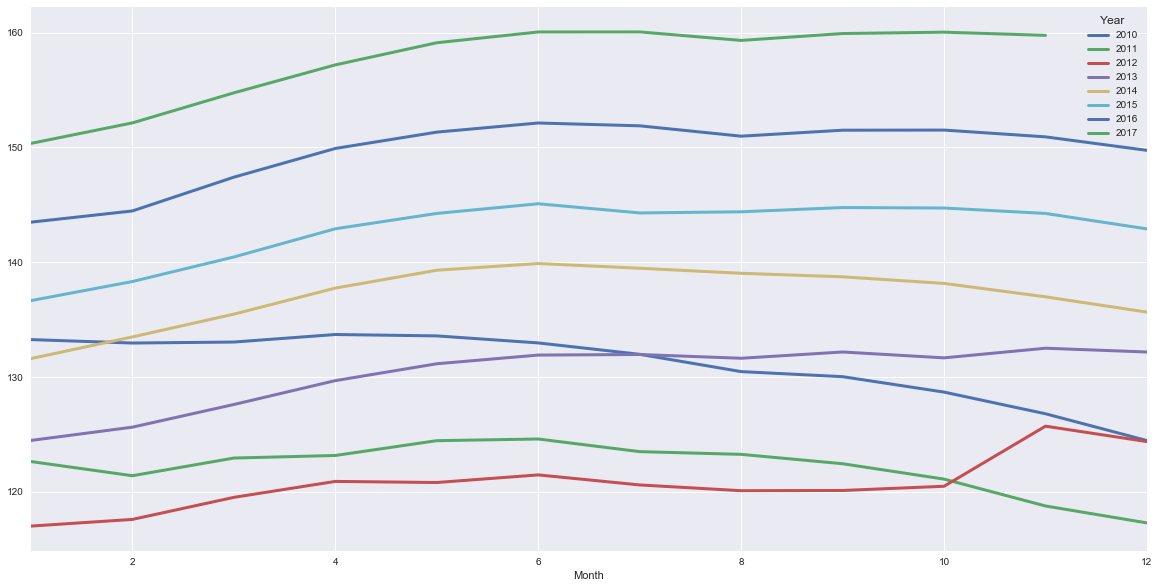

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
season = df
season['Date'] = df.Date
season['Year'] = df['Date'].dt.year
season['Month'] = df['Date'].dt.month
spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'MedianListingPricePerSqft_AllHomes', aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=3)
plt.show()

from above graph, we can see that
1. The price start decreasing in year 2010 and continued till 2012. The price in year 2013 is almost equivalent to 2010.
2. The best time to sell the house in a year is from June to October. The price is peak in these months consistently in all the years even during the down trend. Alternatively the best time to buy the house is in December & January.
3. The price drops may be due to holiday season or some other reason is a problem for us to solve another day.

## Correlation
I always have a doubt whether various bedroom types have any relation during the trends. Let's find out.

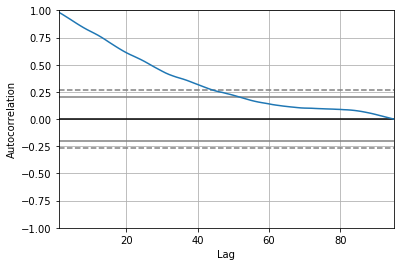

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

brtypes = df.groupby('Date')['Date','MedianListingPricePerSqft_1Bedroom', 'MedianListingPricePerSqft_2Bedroom','MedianListingPricePerSqft_3Bedroom','MedianListingPricePerSqft_4Bedroom','MedianListingPricePerSqft_5BedroomOrMore'].\
    mean().dropna()
pd.plotting.autocorrelation_plot(brtypes);
plt.show()

The above graph shows there is a positive correlation for all the bedroom types, but still it is not clear how each bedroom types are correlated. Let us find out.

In [34]:
brtypes.corr()

,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore
MedianListingPricePerSqft_1Bedroom,1.000000,0.869769,0.834149,0.776416,0.748781
MedianListingPricePerSqft_2Bedroom,0.869769,1.000000,0.995036,0.980379,0.970255
MedianListingPricePerSqft_3Bedroom,0.834149,0.995036,1.000000,0.993445,0.983750
MedianListingPricePerSqft_4Bedroom,0.776416,0.980379,0.993445,1.000000,0.995176
MedianListingPricePerSqft_5BedroomOrMore,0.748781,0.970255,0.983750,0.995176,1.000000


The above table confirms the correlation and to be more specific let us remove the seasonality from the data and see. This is called order of correlation.

In [35]:
brtypes.diff().corr()

,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore
MedianListingPricePerSqft_1Bedroom,1.000000,0.648134,0.688513,0.634148,0.558673
MedianListingPricePerSqft_2Bedroom,0.648134,1.000000,0.936531,0.914260,0.872121
MedianListingPricePerSqft_3Bedroom,0.688513,0.936531,1.000000,0.951192,0.878442
MedianListingPricePerSqft_4Bedroom,0.634148,0.914260,0.951192,1.000000,0.910900
MedianListingPricePerSqft_5BedroomOrMore,0.558673,0.872121,0.878442,0.910900,1.000000


First order difference in correlation still has better correlation between bedroom types. You can see 1 Bedroom & 2 Bedroom are highly correlated than 1 bedroom & 5 bedroom. 

# Forecast
We will do the forecast with Median Listing price per sq ft All Homes. Let us see the trend first.

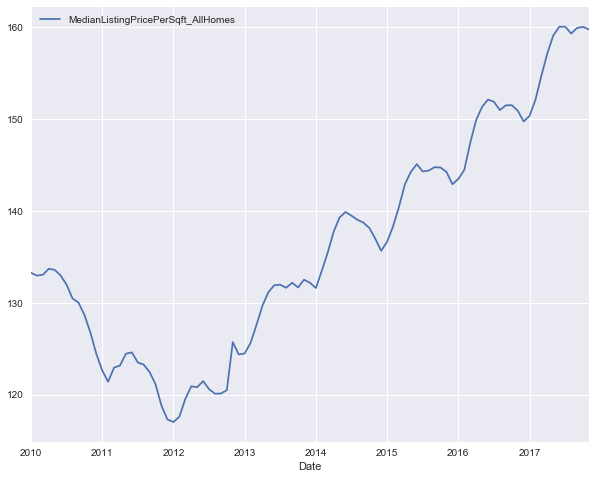

In [104]:
allhomes = df.groupby('Date')['Date','MedianListingPricePerSqft_AllHomes'].mean().dropna()
allhomes.plot(figsize=(10,8))
plt.show()

In the above graph, you can see the clear trend but also there are seasonality in the trend. The forecast for the time series should be stationary otherwise the predictions may not correct.

## ARIMA forecast model
One of the common model used to forecast time series data is ARIMA. It stands for Autoregressive integrated moving average. One of the parameters are p, d & q. As you know the data has seasonality and let us use Seasonal ARIMA, SARIMAX to forecast the mode. There is a separate process to to identify the optmimum parameters, I did a grid search on GPU machine and it stopped after 700+ iterations.

In [ ]:
import warnings
from pandas import datetime
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import itertools
warnings.filterwarnings("ignore")

#evaluate SARIMAX model for given order & seasonal order
def evaluate_sarimax_model(dataset, param, seasonal_param):
    #train test split
    train_size = int(len(dataset) * 0.60)
    train, test = dataset[0:train_size], dataset[train_size:]
    try:
        mod = sm.tsa.statespace.SARIMAX(dataset,
                                       order = param,
                                       seasonal_order = seasonal_param,
                                       enforce_stationarity = False,
                                       enforce_invertibility = False)
        results = mod.fit()
        pred = results.get_prediction(start = test.iloc(train_size)[0].name, dynamic = False)
        pred_ci = pred.conf_int()
        error = mean_squared_error(test, pred.predicted_mean)
        return error
        print('SARIMAX results for {} {} AIC {} MSE {}'.format(param, seasonal_param, results.aic, mse))
    except:
        return float("inf")

def evaluate_models(dataset, p_values, d_values, q_values, s_value):
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], s_value) for x in list(itertools.product(p, d, q))]
    best_score = float("inf")
    best_param = best_seasonal_param = None
    for param in pdq:
        for seasonal_param in seasonal_pdq:
            try:
                mse = evaluate_sarimax_model(dataset, param, seasonal_param)
                #print(best_score, mse)
                if mse < best_score:
                    best_score, best_param, best_seasonal_param = mse, param, seasonal_param
                print('SARIMAX results for {} {} MSE {}'.format(param, seasonal_param, mse))
            except:
                continue
    print('Best results are mse {} order {} seasonal order {}'.format(best_score, best_param, best_seasonal_param))

The output of the above code is suppressed as the above process may run for hours based on the capacity of the system. This is the code used to do the grid search for hyper parameter tuning.

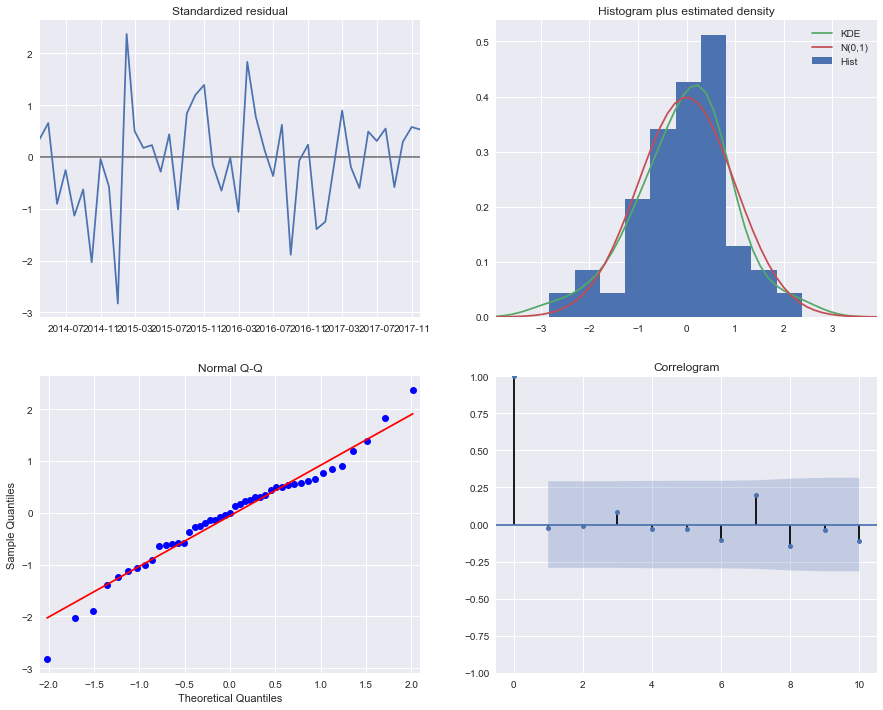

In [103]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
mod = sm.tsa.statespace.SARIMAX(allhomes,
                                    order = (2, 0, 4),
                                    seasonal_order = (3, 1, 2, 12),
                                    enforce_stationarity = False,
                                    enforce_invertibility = False)
results = mod.fit()
results.plot_diagnostics(figsize=(15,12))
plt.show()

From the above graph, we can see that

1. The histogram has minor difference with KDE
2. Linear regression can be improved
3. There are still positive correlation, this can be optimized further.

## Validate the Model
Let us validate the model by Train Test & Split.

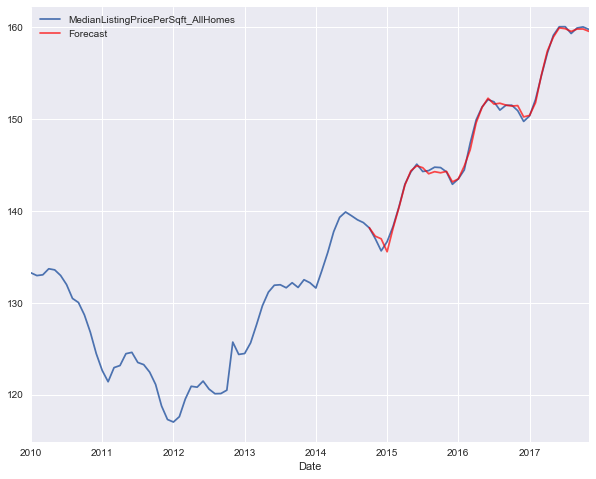

In [102]:
train_size = int(len(allhomes) * 0.60)
train, test = allhomes[0:train_size], allhomes[train_size:]

pred = results.get_prediction(start = test.iloc(train_size)[0].name, dynamic = False)
pred_ci = pred.conf_int()

ax = allhomes.plot(label='actual', figsize=(10,8))
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=0.7, color='red')
plt.legend()
plt.show()

The predictions above is not perfect but it is still better compare to other parameters. Let us see the Mean Squared Error of the model.

In [98]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, pred.predicted_mean)
print('MSE {}'.format(error))

MSE 0.17096716457360572


The mean squared error is 0.171, so it means the forecast can be till improved. Now let us predict for the future.

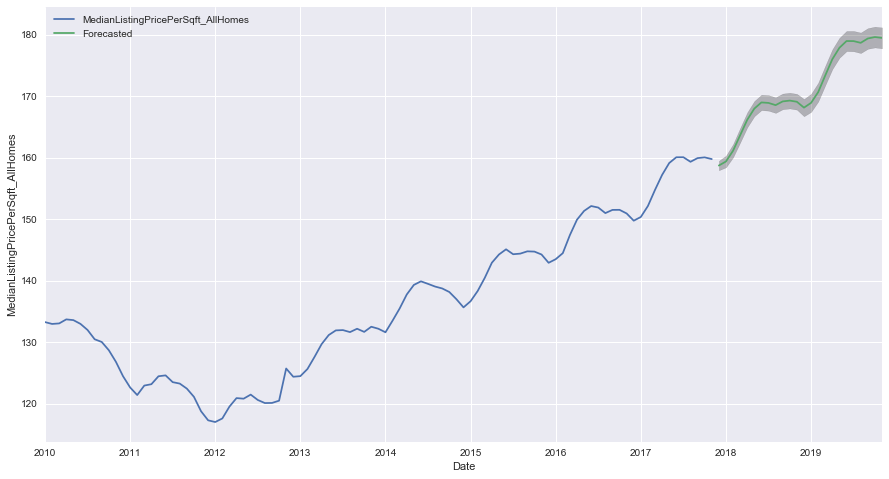

In [101]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()

ax = allhomes.plot(label = 'Actual', figsize=(15,8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecasted')
ax.fill_between(pred_ci.index,
                   pred_ci.iloc[:,0],
                   pred_ci.iloc[:,1],
                   color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('MedianListingPricePerSqft_AllHomes')
plt.legend()
plt.show()


In the above graph you can see the forecast for next 24 months and the confidence interval is also better and not too much variance.